In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd

In [50]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [53]:
# Declare a Base using automap_base()
Base = automap_base()

In [54]:
# Use the base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [55]:
# Print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [56]:
# Assign the classes keys to a variable called 'Classes keys'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [90]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [91]:
# Convert the June temperatures to a list
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [61]:
# Display the row's and colume adn data in the dictionary foramt
results = session.query(Measurement.date, Measurement.prcp)

In [62]:
df = pd.DataFrame(results, columns=['date','tobs'])

In [63]:
results = []
print (df)

             date  tobs
0      2010-01-01  0.08
1      2010-01-02  0.00
2      2010-01-03  0.00
3      2010-01-04  0.00
4      2010-01-06   NaN
...           ...   ...
19545  2017-08-19  0.09
19546  2017-08-20   NaN
19547  2017-08-21  0.56
19548  2017-08-22  0.50
19549  2017-08-23  0.45

[19550 rows x 2 columns]


In [64]:
# Display the row's and colume and data in the dictionary foramt
results = session.query(Measurement.date, Measurement.prcp)

In [65]:
results


In [ ]:
# Use the session to query Data keys and display the first 15 weather data

print(results.all()).limit().all()

In [67]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

In [68]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [ ]:
print(results)

In [70]:
df = pd.DataFrame(results, columns=['date','precipitation'])

In [71]:
df.set_index(df['date'], inplace=True)

In [72]:
print(df)

                  date  precipitation
date                                 
2017-06-01  2017-06-01           0.00
2017-06-02  2017-06-02           0.00
2017-06-03  2017-06-03           0.02
2017-06-04  2017-06-04           0.00
2017-06-05  2017-06-05           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[476 rows x 2 columns]


In [73]:
print(df.to_string(index=False))

      date  precipitation
2017-06-01           0.00
2017-06-02           0.00
2017-06-03           0.02
2017-06-04           0.00
2017-06-05           0.00
2017-06-06           0.00
2017-06-07           0.00
2017-06-08           0.00
2017-06-09           0.00
2017-06-10           0.04
2017-06-11           0.08
2017-06-12           0.02
2017-06-13           0.00
2017-06-14           0.00
2017-06-15           0.00
2017-06-16           0.00
2017-06-17           0.00
2017-06-18           0.05
2017-06-19           0.00
2017-06-20           0.02
2017-06-21           0.00
2017-06-22           0.00
2017-06-23           0.00
2017-06-24           0.06
2017-06-25           0.00
2017-06-26           0.00
2017-06-27           0.00
2017-06-28           0.00
2017-06-29           0.00
2017-06-30           0.08
2017-07-01           0.02
2017-07-02           0.02
2017-07-03           0.04
2017-07-04           0.04
2017-07-05           0.00
2017-07-06           0.00
2017-07-07           0.00
2017-07-08  

In [74]:
df = df.sort_index()

In [75]:
print(df.to_string(index=False))

      date  precipitation
2017-06-01           0.00
2017-06-01           0.03
2017-06-01           0.00
2017-06-01           0.00
2017-06-01           0.01
2017-06-01           0.00
2017-06-02           0.15
2017-06-02           0.10
2017-06-02            NaN
2017-06-02           0.00
2017-06-02           0.00
2017-06-02           0.09
2017-06-03           0.20
2017-06-03            NaN
2017-06-03           0.16
2017-06-03           0.02
2017-06-03           0.15
2017-06-03           0.08
2017-06-04           0.05
2017-06-04           0.13
2017-06-04           0.15
2017-06-04           0.82
2017-06-04           0.00
2017-06-04           0.00
2017-06-05           0.00
2017-06-05           0.00
2017-06-05           0.00
2017-06-05           0.02
2017-06-05            NaN
2017-06-05           0.05
2017-06-05           0.01
2017-06-06           0.00
2017-06-06           0.00
2017-06-06            NaN
2017-06-06           0.00
2017-06-06           0.00
2017-06-06           0.00
2017-06-06  

<AxesSubplot:xlabel='date'>

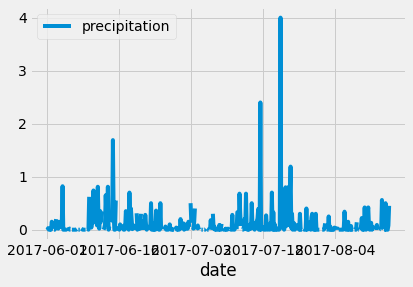

In [76]:
df.plot()

In [77]:
df.describe()

,precipitation
count,428.000000
mean,0.115467
std,0.289144
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [78]:
session.query(func.count(Station.station)).all()

[(9,)]

In [79]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [80]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [82]:
session.query(Measurement.tobs)

In [83]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [84]:
print(results)

[(80.0,), (76.0,), (76.0,), (77.0,), (75.0,), (75.0,), (75.0,), (75.0,), (72.0,), (74.0,), (74.0,), (74.0,), (76.0,), (74.0,), (75.0,), (73.0,), (79.0,), (75.0,), (72.0,), (72.0,), (74.0,), (72.0,), (72.0,), (77.0,), (71.0,), (73.0,), (76.0,), (77.0,), (76.0,), (76.0,), (79.0,), (81.0,), (76.0,), (78.0,), (77.0,), (74.0,), (75.0,), (78.0,), (78.0,), (69.0,), (72.0,), (74.0,), (74.0,), (76.0,), (80.0,), (80.0,), (76.0,), (76.0,), (76.0,), (77.0,), (77.0,), (77.0,), (82.0,), (75.0,), (77.0,), (75.0,), (76.0,), (81.0,), (82.0,), (81.0,), (76.0,), (77.0,), (82.0,), (83.0,), (77.0,), (77.0,), (77.0,), (76.0,), (76.0,), (79.0,)]


In [85]:
df = pd.DataFrame(results, columns=['tobs'])

In [86]:
print(df)

    tobs
0   80.0
1   76.0
2   76.0
3   77.0
4   75.0
..   ...
65  77.0
66  77.0
67  76.0
68  76.0
69  79.0

[70 rows x 1 columns]


<AxesSubplot:ylabel='Frequency'>

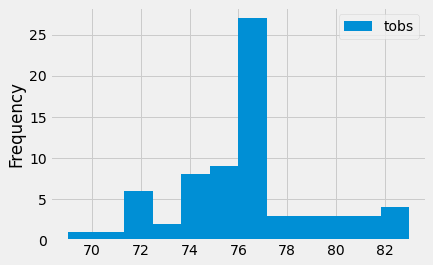

In [87]:
df.plot.hist(bins=12)

In [88]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

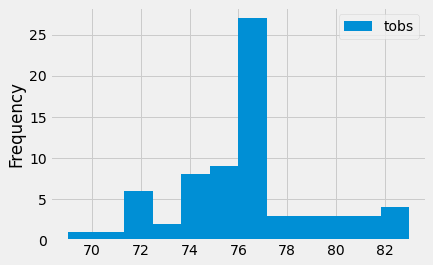

In [89]:
df.plot.hist(bins=12)

In [ ]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
